In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from skimage.measure import label, regionprops

In [2]:
#E:\Pattern Recognition\DigitRecognizer\data


images = np.load('/mnt/e/Pattern Recognition/DigitRecognizer/data/images.npy')
labels = np.load('/mnt/e/Pattern Recognition/DigitRecognizer/data/labels.npy')



In [3]:
pd.value_counts(pd.Series(labels))

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

Correct label for this number is 5


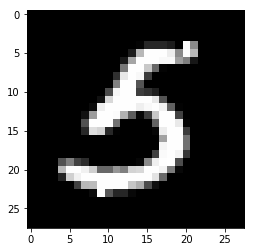

In [4]:
plt.imshow(images[679,:,:], cmap='gray')
print('Correct label for this number is {}'.format(labels[679]))

In [5]:
print(type(images))
print(np.amin(images))
print(np.amax(images))
print(images[679,:,:].dtype)
print(np.shape(images))

<class 'numpy.ndarray'>
0.0
255.0
float32
(60000, 28, 28)


#### Next step is to transfer dtype into uint8
#### Then create a negative variant of array 

In [6]:
#transfer everything to uint8 

im = np.empty(np.shape(images), dtype = 'uint8')
im[:,:,:] = images[:,:,:]

In [ ]:
#create negative array

neg = np.empty(np.shape(im), dtype = 'uint8')
neg[:,:,:] = 255-images[:,:,:]

In [ ]:
plt.imshow(neg[679,:,:], cmap='gray')

#### Next step is to make thresholding of the image, in this case all pixels > than 100 will be black and < than 100 will be white

In [7]:
thresh = np.empty(np.shape(images), dtype='uint8')
thresh[images < 100] = 0 #black
thresh[images > 100] = 1 #white

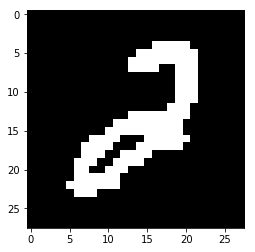

In [8]:
plt.imshow(thresh[555,:,:],cmap='gray')

#### Exercises with resursion

In [9]:
#digit example

def count_to_zero(n):
    
    print(n)
    if n == 0:
        print('That is all ... zero ...')
        return 0
    count_to_zero(n-1)
    
count_to_zero(10)

10
9
8
7
6
5
4
3
2
1
0
That is all ... zero ...


In [ ]:
thresh.shape

In [ ]:
#connected regions labeling
import time
start = time.time()
def connected_regions(A):
    im = label(A, background=1)
    return im

labeled_arr = np.zeros(thresh.shape, dtype='uint')

for i,y in enumerate(thresh): 
    labeled_arr[i,:,:] = connected_regions(thresh[i,:,:])
elapsed_time_fl = (time.time() - start) 
elapsed_time_fl

In [ ]:
#vectorized function execution 
labeled_vect = np.zeros(thresh.shape, dtype='uint')
%time labeled_vect[:,:,:] = connected_regions(thresh[:,:,:])

In [ ]:
#Blackness ratio 

#bounding box finding
#for one digit
def bbox_coords(A):
    
    regions = regionprops(A) #A = labeled image
    
    
    for props in regions: 
        
        minr, minc, maxr, maxc = props.bbox
        
    return tuple(minr, minc, maxr, maxc)
    

#for one digit 
def blackness_ration(A,coordinates):
    
    patch = A[coordinates(0):coordinates(2), coordinates(1):coordinates(3)]
    area_region=np.size(patch[patch==1])
    area_bbox=np.size(patch)
    blackness_ratio=area_region/area_bbox
    
    return blackness_ratio





In [ ]:
#feature extraction
def get_prop(A):
    labeled_image = label(A, background=1)

In [ ]:
#aspect ratio
#one digit` matrix

def aspect_ratio(coordinates): 
    
    asp_ratio = (coordinates(3)-coordinates(1)+1) / (coordinates(2)-coordinates(0)+1)
    return asp_ratio
    

 
    
    

In [ ]:
#number of holes


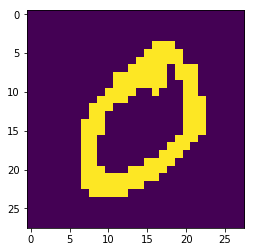

In [33]:
plt.imshow(thresh[1,:,:])

In [34]:
image_label = label(thresh[1,:,:], background=-1)
props = regionprops(image_label)

#for props in a:
   # minr, minc, maxr, maxc = props.bbox
    


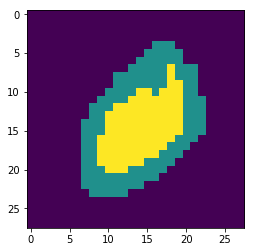

In [35]:
plt.imshow(image_label)

In [36]:
len(props)-2

1

In [28]:
props[1].bbox_area

280